In [368]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [369]:
df = pd.read_excel('Train.xlsx')
df.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250


In [370]:
df.shape

(5961, 7)

In [371]:
df.dtypes

Qualification         object
Experience            object
Rating                object
Place                 object
Profile               object
Miscellaneous_Info    object
Fees                   int64
dtype: object

    We can see first hand that the Qualification column will be tough to work with. Checking the individual values in that column

In [372]:
df['Qualification'].value_counts().index.tolist()

['BDS',
 'BHMS',
 'BAMS',
 'MBBS',
 'MBBS, MS - ENT',
 'MBBS, MD - Dermatology',
 'MBBS, MD - General Medicine',
 'MBBS, MD - Dermatology , Venereology & Leprosy',
 'BHMS, MD - Homeopathy',
 'MBBS, DDVL',
 'MBBS, Diploma in Otorhinolaryngology (DLO)',
 'BAMS, MD - Ayurveda Medicine',
 'BDS, MDS - Conservative Dentistry & Endodontics',
 'MBBS, DDV',
 'BDS, MDS',
 'BDS, MDS - Oral & Maxillofacial Surgery',
 'MD - Dermatology , Venereology & Leprosy, MBBS',
 'BDS, MDS - Prosthodontics',
 'MBBS, MS - Otorhinolaryngology',
 'MBBS, MD - Internal Medicine',
 'BDS, MDS - Orthodontics',
 'MBBS, MD - Medicine',
 'MS - ENT, MBBS',
 'BDS, MDS - Paedodontics And Preventive Dentistry',
 'MBBS, Diploma in Dermatology',
 'MD - Dermatology, MBBS',
 'BDS, MDS - Orthodontics and Dentofacial Orthopaedics',
 'BDS, MDS - Periodontology and Oral Implantology',
 'MBBS, Diploma in Otorhinolaryngology (DLO), DNB - ENT',
 'BDS, MDS - Pedodontics',
 'BDS, MDS - Prosthodontist And Crown Bridge',
 'Get inspired by 

    The Second column we're going to have trouble working with is experience. We will have to change the column entries to just numbers. 

In [373]:
#Changing Experience values to numbers
df['Experience'] = df['Experience'].str.split().str[0]

In [374]:
df.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD - Ayurveda Medicine",12,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,"MBBS, MS - Otorhinolaryngology",9,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300
3,"BSc - Zoology, BAMS",12,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250
4,BAMS,20,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250


In [375]:
df.isnull().sum()

Qualification            0
Experience               0
Rating                3302
Place                   25
Profile                  0
Miscellaneous_Info    2620
Fees                     0
dtype: int64

    We can see that there are high number of null values in Rating and Miscellaneous_Info
    
    Places has less number of null values which can be changed to None, as imputing it with most_frequent don't make sense. 

In [376]:
df['Place'].fillna('Location,City',inplace=True)

    Now splitting the Place into two separate columns Area and City

In [377]:
df['Area'] = df['Place'].str.rsplit(',',1).str.get(0)
df['City'] = df['Place'].str.rsplit(',',1).str.get(1)

    Now we can drop the Place column.

In [378]:
df.drop(['Place'], inplace = True, axis = 1)

In [379]:
df.head()

,Qualification,Experience,Rating,Profile,Miscellaneous_Info,Fees,Area,City
0,"BHMS, MD - Homeopathy",24,100%,Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100,Kakkanad,Ernakulam
1,"BAMS, MD - Ayurveda Medicine",12,98%,Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350,Whitefield,Bangalore
2,"MBBS, MS - Otorhinolaryngology",9,NaN,ENT Specialist,NaN,300,Mathikere - BEL,Bangalore
3,"BSc - Zoology, BAMS",12,NaN,Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250,Bannerghatta Road,Bangalore
4,BAMS,20,100%,Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250,Keelkattalai,Chennai


In [380]:
df.isnull().sum()

Qualification            0
Experience               0
Rating                3302
Profile                  0
Miscellaneous_Info    2620
Fees                     0
Area                     0
City                     1
dtype: int64

    Changing the 1 null value in City column

In [381]:
df.loc[df['City'].isnull(),'Area']='City'
df['City']=df['City'].fillna('City')

In [382]:
df.isnull().sum()

Qualification            0
Experience               0
Rating                3302
Profile                  0
Miscellaneous_Info    2620
Fees                     0
Area                     0
City                     0
dtype: int64

    Now we can deal with the qualification column.

In [383]:
df["Qualification"]=df["Qualification"].str.split(",")
Qualification ={}
for x in df["Qualification"].values:
    for each in x:
        each = each.strip()
        if each in Qualification:
            Qualification[each]+=1
        else:
            Qualification[each]=1
            
print(Qualification)

{'BHMS': 749, 'MD - Homeopathy': 181, 'BAMS': 764, 'MD - Ayurveda Medicine': 139, 'MBBS': 2808, 'MS - Otorhinolaryngology': 103, 'BSc - Zoology': 3, 'BDS': 1363, 'MD - General Medicine': 285, 'BSc': 3, 'MS': 2, 'DNB - ENT': 111, 'MDS': 82, 'MDS - Oral & Maxillofacial Surgery': 104, 'Diploma in Otorhinolaryngology (DLO)': 250, 'MF- Homeopathy': 5, 'MS - ENT': 411, 'DNB': 58, 'Fellowship of College of General Practice (FCGP)': 13, 'DDVL': 161, 'IBCLC (USA)': 1, 'Post Graduate Diploma in Diabetology (PGDD)': 53, 'Diploma in Dermatology': 67, 'Fellowship in Aesthetic Medicine': 23, 'DM - Neurology': 6, 'MD - Pediatrics': 13, 'Fellowship in Cleft Lip and Craniofacial Surgery': 1, 'Diploma in Cosmetology': 3, 'AFIH': 4, 'MDS - Prosthodontist And Crown Bridge': 45, 'M. D. Hom. (Practice of Medicine)': 2, 'Diploma in Emergency Medicine': 8, 'Diploma in Counselling Skills': 2, 'DHMS (Diploma in Homeopathic Medicine and Surgery)': 47, 'MD - Dermatology': 606, 'Venereology & Leprosy': 297, 'MDS -

    From the data dump dictionary above to pick out the details we require.

In [384]:
qualific = sorted(Qualification.items(),key=lambda x:x[1],reverse=True)[:15]
final_qualific = []
for qual in qualific:
    final_qualific.append(qual[0])
    
print(final_qualific)

['MBBS', 'BDS', 'BAMS', 'BHMS', 'MD - Dermatology', 'MS - ENT', 'Venereology & Leprosy', 'MD - General Medicine', 'Diploma in Otorhinolaryngology (DLO)', 'MD - Homeopathy', 'DDVL', 'MD - Ayurveda Medicine', 'DDV', 'DNB - ENT', 'MDS - Conservative Dentistry & Endodontics']


In [385]:
for qual in final_qualific:
    df[qual] = 0

for x,y in zip(df['Qualification'].values, np.array([i for i in range(len(df))])):
    for c in x:
        c = c.strip()
        if c in final_qualific:
            df[c][y] = 1

In [386]:
df.isnull().sum()

Qualification                                    0
Experience                                       0
Rating                                        3302
Profile                                          0
Miscellaneous_Info                            2620
Fees                                             0
Area                                             0
City                                             0
MBBS                                             0
BDS                                              0
BAMS                                             0
BHMS                                             0
MD - Dermatology                                 0
MS - ENT                                         0
Venereology & Leprosy                            0
MD - General Medicine                            0
Diploma in Otorhinolaryngology (DLO)             0
MD - Homeopathy                                  0
DDVL                                             0
MD - Ayurveda Medicine         

In [387]:
df.drop(columns='Qualification', axis = 1, inplace = True)

In [388]:
df.head()

,Experience,Rating,Profile,Miscellaneous_Info,Fees,Area,City,MBBS,BDS,BAMS,...,MS - ENT,Venereology & Leprosy,MD - General Medicine,Diploma in Otorhinolaryngology (DLO),MD - Homeopathy,DDVL,MD - Ayurveda Medicine,DDV,DNB - ENT,MDS - Conservative Dentistry & Endodontics
0,24,100%,Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100,Kakkanad,Ernakulam,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,12,98%,Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350,Whitefield,Bangalore,0,0,1,...,0,0,0,0,0,0,1,0,0,0
2,9,NaN,ENT Specialist,NaN,300,Mathikere - BEL,Bangalore,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,12,NaN,Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250,Bannerghatta Road,Bangalore,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,20,100%,Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250,Keelkattalai,Chennai,0,0,1,...,0,0,0,0,0,0,0,0,0,0


    To deal with the ratings column

In [389]:
df['Rating'].fillna('-9%',inplace=True)

    We have changed the value to -9% and this will be later grouped into different columns. 

In [390]:
for i in df['Rating'].value_counts().index:
    df['Rating'].replace(i,int(i[:-1]),inplace = True)

    Now we will separate it to 10 bins

In [391]:
bins = [-10,0,10,20,30,40,50,60,70,80,90,100]

labels = [i for i in range(11)]
df['Rating'] = pd.cut(df['Rating'], bins=bins, labels=labels, include_lowest=True)

In [392]:
df.head()

,Experience,Rating,Profile,Miscellaneous_Info,Fees,Area,City,MBBS,BDS,BAMS,...,MS - ENT,Venereology & Leprosy,MD - General Medicine,Diploma in Otorhinolaryngology (DLO),MD - Homeopathy,DDVL,MD - Ayurveda Medicine,DDV,DNB - ENT,MDS - Conservative Dentistry & Endodontics
0,24,10,Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100,Kakkanad,Ernakulam,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,12,10,Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350,Whitefield,Bangalore,0,0,1,...,0,0,0,0,0,0,1,0,0,0
2,9,0,ENT Specialist,NaN,300,Mathikere - BEL,Bangalore,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,12,0,Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250,Bannerghatta Road,Bangalore,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,20,10,Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250,Keelkattalai,Chennai,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [393]:
df['Rating'].value_counts()

0     3302
10    2222
9      280
8       98
7       32
6       19
4        4
5        3
1        1
2        0
3        0
Name: Rating, dtype: int64

    Now we can proceed to remove the Miscellaneous_Info column as most of it is null.

In [394]:
df.drop(columns='Miscellaneous_Info', axis = 1, inplace = True)

In [395]:
for i in df.columns:
    a = df[i].nunique()
    b = df[i].dtypes
    print('Unique values in ', i, '=', a, '------ Type: ', b)

Unique values in  Experience = 64 ------ Type:  object
Unique values in  Rating = 9 ------ Type:  category
Unique values in  Profile = 6 ------ Type:  object
Unique values in  Fees = 40 ------ Type:  int64
Unique values in  Area = 868 ------ Type:  object
Unique values in  City = 9 ------ Type:  object
Unique values in  MBBS = 2 ------ Type:  int64
Unique values in  BDS = 2 ------ Type:  int64
Unique values in  BAMS = 2 ------ Type:  int64
Unique values in  BHMS = 2 ------ Type:  int64
Unique values in  MD - Dermatology = 2 ------ Type:  int64
Unique values in  MS - ENT = 2 ------ Type:  int64
Unique values in  Venereology & Leprosy = 2 ------ Type:  int64
Unique values in  MD - General Medicine = 2 ------ Type:  int64
Unique values in  Diploma in Otorhinolaryngology (DLO) = 2 ------ Type:  int64
Unique values in  MD - Homeopathy = 2 ------ Type:  int64
Unique values in  DDVL = 2 ------ Type:  int64
Unique values in  MD - Ayurveda Medicine = 2 ------ Type:  int64
Unique values in  DDV 

### Visualization

<Figure size 1080x360 with 0 Axes>

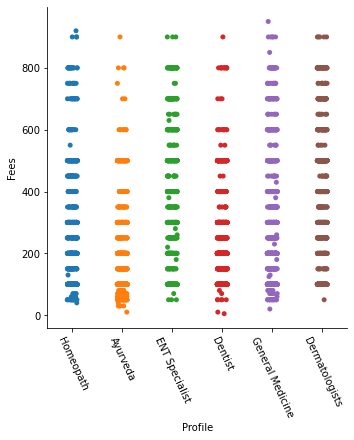

In [396]:
plt.figure(figsize=(15,5))
sb.catplot(x = 'Profile', y = 'Fees', data = df)
plt.xticks(rotation = -65, fontsize = 10)
plt.show()

    We can see that there are physicians who accept high and low fee in all categories. 

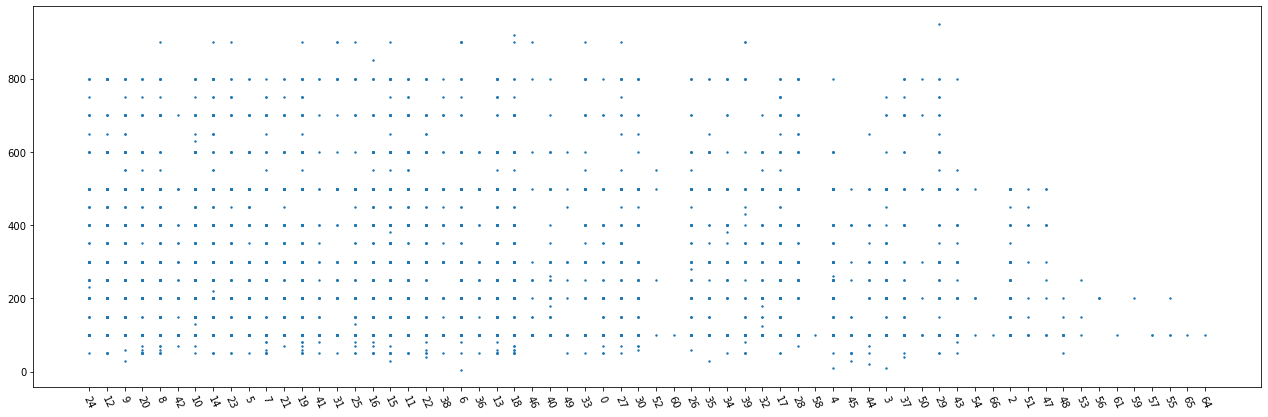

In [397]:
plt.figure(figsize = (22,7))
plt.scatter(df['Experience'],df['Fees'],s=2)
plt.xticks(rotation = -65, fontsize = 10)
plt.show()

    We can see that experience and fee are not much related

<Figure size 1584x504 with 0 Axes>

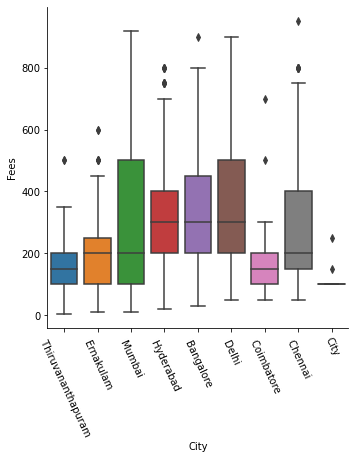

In [398]:
plt.figure(figsize = (22,7))
sb.catplot(x='City',y='Fees', data=df.sort_values("Fees"),kind='box')
plt.xticks(rotation = -65, fontsize = 10)
plt.show()

    We can see that the highest prices for consultation are in Mumbai, Bangalore and Delhi. 

    The lowest is in 'City' and Coimbatore

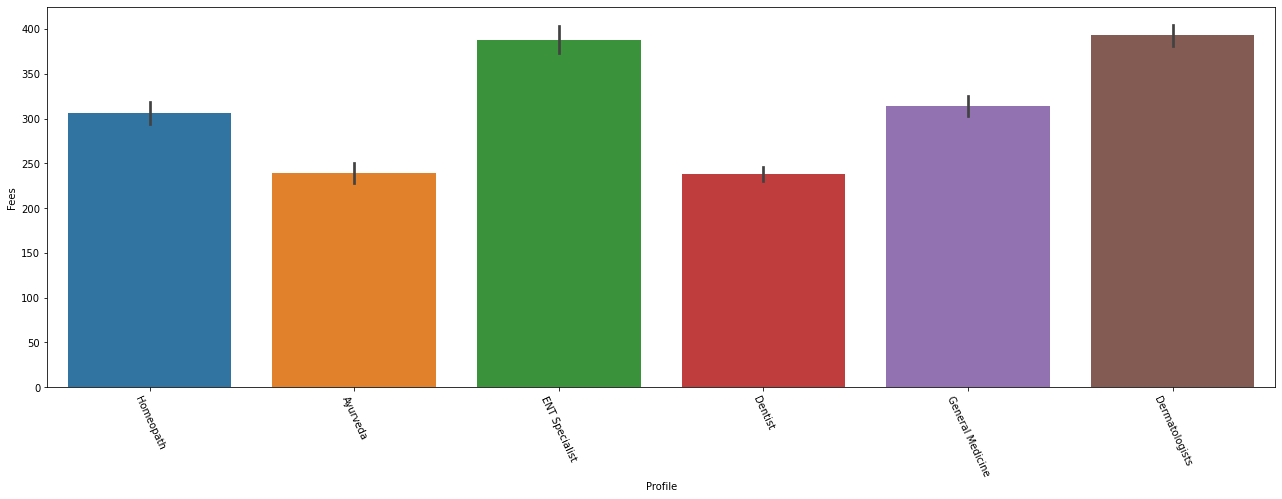

In [399]:
plt.figure(figsize = (22,7))
sb.barplot(x='Profile',y='Fees',data=df)
plt.xticks(rotation = -65, fontsize = 10)
plt.show()

    We can see that ENT Specialists and Dermatologists charge the highest fee

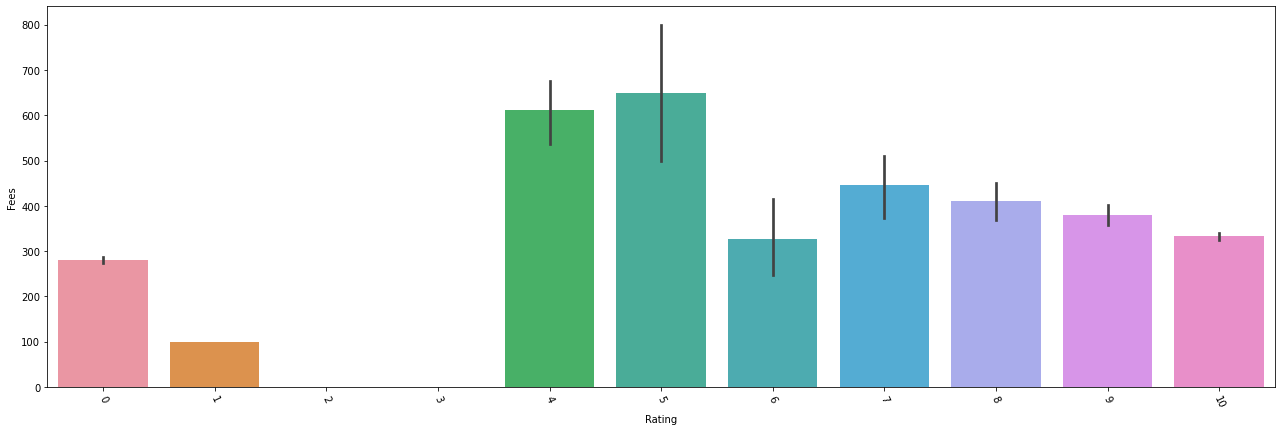

In [400]:
plt.figure(figsize = (22,7))
sb.barplot(x='Rating',y='Fees',data=df)
plt.xticks(rotation = -65, fontsize = 10)
plt.show()

    We can see that the doctors with rating 4 and 5 are charging the highest. This means that the more pricy doesn't mean they're the best rated. 

### Encoding

In [401]:
from sklearn.preprocessing import OrdinalEncoder

In [402]:
oe=OrdinalEncoder()

In [403]:
df['Area'] = oe.fit_transform(df['Area'].values.reshape(-1,1))
df['Profile'] = oe.fit_transform(df['Profile'].values.reshape(-1,1))
df['City'] = oe.fit_transform(df['City'].values.reshape(-1,1))
df['Experience'] = oe.fit_transform(df['Experience'].values.reshape(-1,1))

In [404]:
df.head()

,Experience,Rating,Profile,Fees,Area,City,MBBS,BDS,BAMS,BHMS,...,MS - ENT,Venereology & Leprosy,MD - General Medicine,Diploma in Otorhinolaryngology (DLO),MD - Homeopathy,DDVL,MD - Ayurveda Medicine,DDV,DNB - ENT,MDS - Conservative Dentistry & Endodontics
0,16.0,10,5.0,100,298.0,4.0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
1,3.0,10,0.0,350,858.0,0.0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
2,63.0,0,3.0,300,455.0,0.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3.0,0,0.0,250,68.0,0.0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,12.0,10,0.0,250,337.0,1.0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


### Summary

In [405]:
df.describe()

,Experience,Profile,Fees,Area,City,MBBS,BDS,BAMS,BHMS,MD - Dermatology,MS - ENT,Venereology & Leprosy,MD - General Medicine,Diploma in Otorhinolaryngology (DLO),MD - Homeopathy,DDVL,MD - Ayurveda Medicine,DDV,DNB - ENT,MDS - Conservative Dentistry & Endodontics
count,5961.000000,5961.000000,5961.000000,5961.000000,5961.000000,5961.000000,5961.000000,5961.000000,5961.000000,5961.000000,5961.000000,5961.000000,5961.000000,5961.000000,5961.000000,5961.000000,5961.000000,5961.000000,5961.000000,5961.000000
mean,23.010904,2.441872,307.944640,412.842476,3.079517,0.470559,0.228485,0.127831,0.125482,0.101493,0.068948,0.049153,0.047811,0.041772,0.030364,0.027009,0.023318,0.021641,0.018453,0.017950
std,20.937163,1.658014,190.920373,255.830044,2.313018,0.499174,0.419892,0.333929,0.331293,0.302006,0.253387,0.216205,0.213384,0.200083,0.171601,0.162123,0.150925,0.145519,0.134595,0.132781
min,0.000000,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.000000,1.000000,150.000000,196.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,15.000000,2.000000,300.000000,408.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,36.000000,4.000000,500.000000,624.000000,5.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,63.000000,5.000000,950.000000,867.000000,8.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<AxesSubplot:>

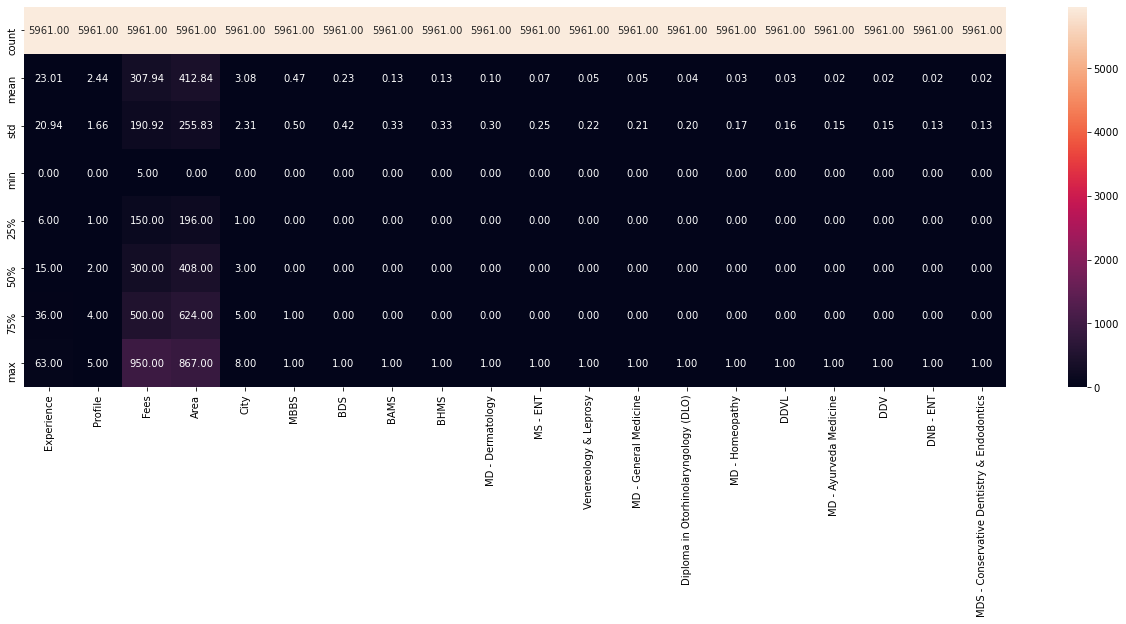

In [406]:
plt.figure(figsize = (22,7))
sb.heatmap(df.describe(), annot = True, fmt = '0.2f')

    We can see that the only high difference between Mean and Max values are in Fees and Area, but area can be ignored.

### Correlation

In [407]:
df.corr()

,Experience,Profile,Fees,Area,City,MBBS,BDS,BAMS,BHMS,MD - Dermatology,MS - ENT,Venereology & Leprosy,MD - General Medicine,Diploma in Otorhinolaryngology (DLO),MD - Homeopathy,DDVL,MD - Ayurveda Medicine,DDV,DNB - ENT,MDS - Conservative Dentistry & Endodontics
Experience,1.000000,-0.032711,-0.048529,-0.001466,0.028797,-0.005388,0.024012,0.014752,-0.028475,0.030871,-0.026297,0.075681,-0.022650,-0.025582,-0.015130,0.009453,-0.000558,-0.039673,-0.023768,0.014595
Profile,-0.032711,1.000000,0.145226,0.019198,-0.015026,0.355290,-0.473295,-0.559943,0.583268,-0.087903,0.093610,-0.059195,0.203958,0.076358,0.273052,-0.043158,-0.227584,-0.036858,0.046160,-0.117582
Fees,-0.048529,0.145226,1.000000,-0.055826,-0.035898,0.271038,-0.198635,-0.139891,-0.002423,0.163811,0.128413,0.113091,0.040921,0.011560,0.018601,0.071667,-0.018600,0.075340,0.070557,-0.021180
Area,-0.001466,0.019198,-0.055826,1.000000,-0.090433,0.021283,0.020308,-0.028846,-0.000675,-0.018725,-0.000032,-0.009497,0.046484,-0.001992,-0.024684,-0.001835,-0.006080,-0.045866,-0.004301,0.009903
City,0.028797,-0.015026,-0.035898,-0.090433,1.000000,-0.062930,-0.015428,0.045055,0.016755,-0.012996,-0.026247,-0.001778,-0.003625,-0.085126,0.032806,-0.023626,0.014874,0.036760,-0.032200,-0.015574
MBBS,-0.005388,0.355290,0.271038,0.021283,-0.062930,1.000000,-0.512244,-0.358911,-0.355083,0.314207,0.263449,0.213185,0.220358,0.206347,-0.164871,0.170506,-0.143443,0.143898,0.135451,-0.127457
BDS,0.024012,-0.473295,-0.198635,0.020308,-0.015428,-0.512244,1.000000,-0.208341,-0.206141,-0.182900,-0.148092,-0.123730,-0.121943,-0.113622,-0.096301,-0.090668,-0.084087,-0.080936,-0.074617,0.230376
BAMS,0.014752,-0.559943,-0.139891,-0.028846,0.045055,-0.358911,-0.208341,1.000000,-0.145019,-0.128669,-0.104182,-0.087044,-0.078722,-0.079932,-0.067747,-0.063785,0.350335,-0.056938,-0.052493,-0.051759
BHMS,-0.028475,0.583268,-0.002423,-0.000675,0.016755,-0.355083,-0.206141,-0.145019,1.000000,-0.127311,-0.103082,-0.086124,-0.077760,-0.079088,0.349109,-0.063111,-0.058530,-0.056337,-0.051938,-0.051212
MD - Dermatology,0.030871,-0.087903,0.163811,-0.018725,-0.012996,0.314207,-0.182900,-0.128669,-0.127311,1.000000,-0.091460,0.637946,-0.075311,-0.064618,-0.059475,-0.014874,-0.051931,0.056914,-0.046083,-0.045438


<AxesSubplot:>

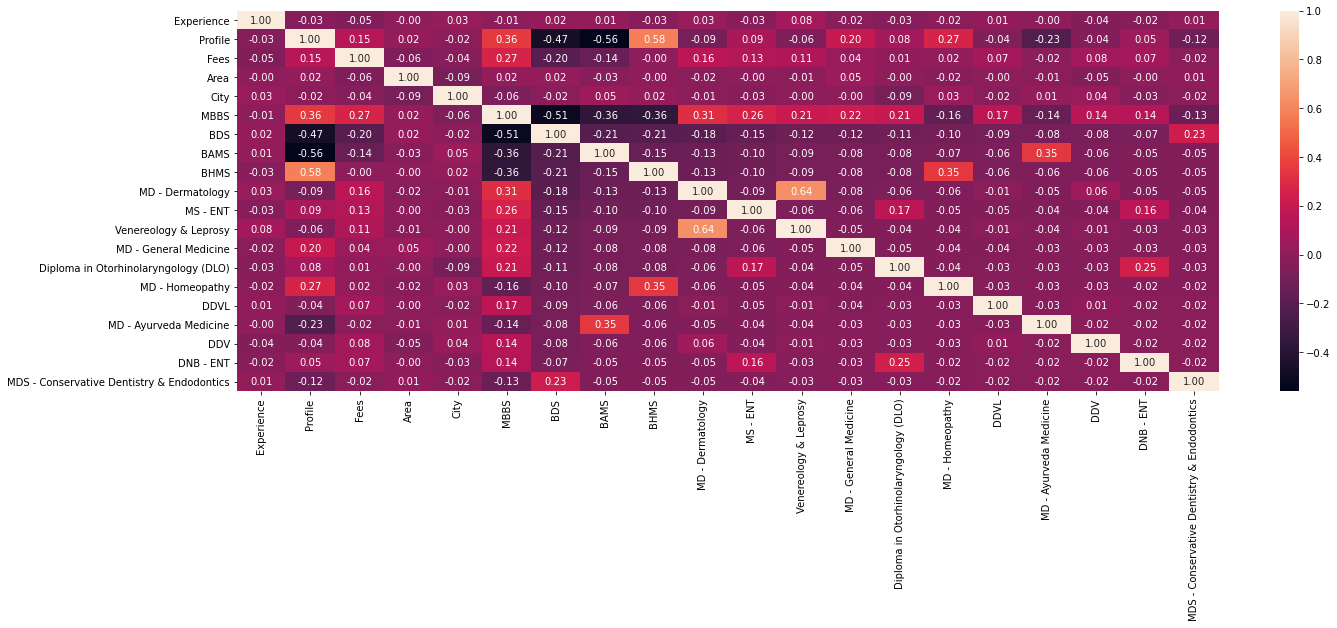

In [408]:
plt.figure(figsize = (22,7))
sb.heatmap(df.corr(), annot = True, fmt = '0.2f')

    Separately plotting low and high correlations. 

<AxesSubplot:>

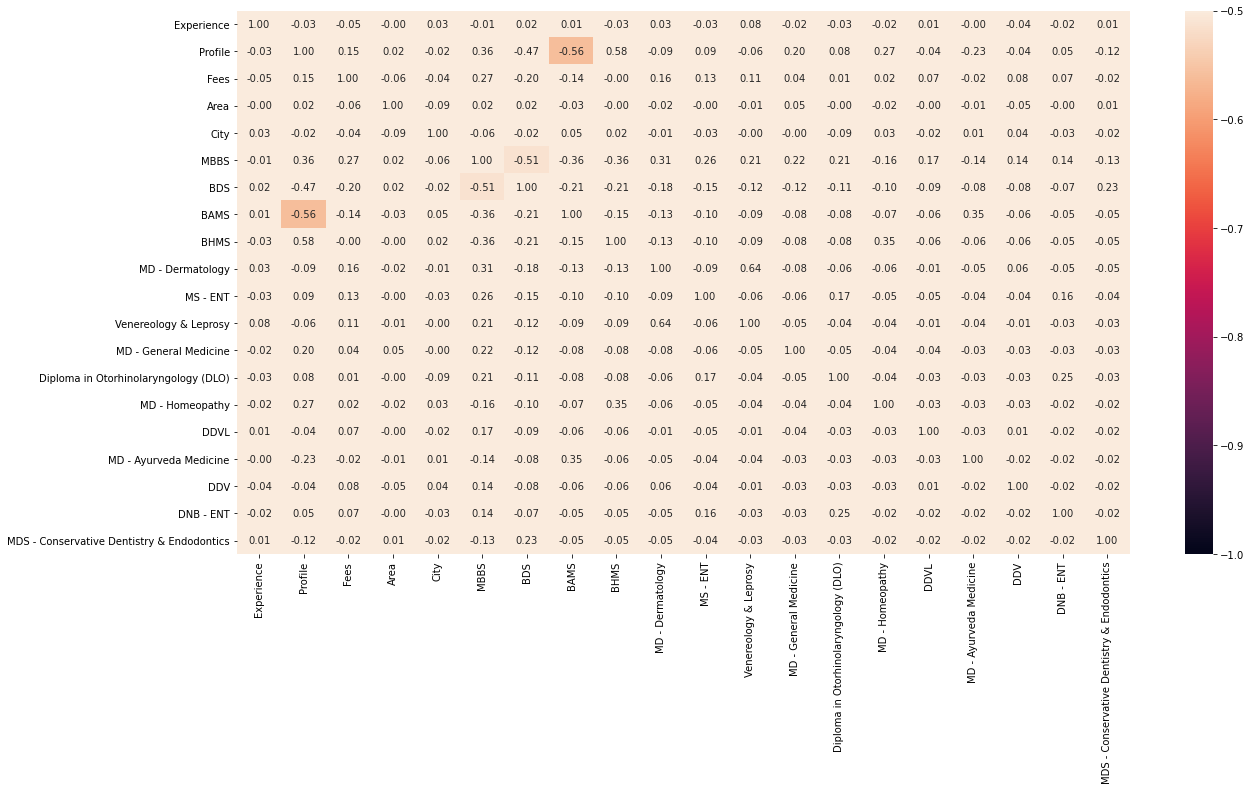

In [409]:
#Highlighting all the values lower than -0.5
#Plot to highlight high negative correlations.
plt.figure(figsize = (20,10))
sb.heatmap(df.corr(), annot = True, fmt = '0.2f', vmin = -0.5, vmax = -1)

Observations: 
    
    We can see high negative correlation between BAMS and profile columns. 
    
    BDS and MBBS

<AxesSubplot:>

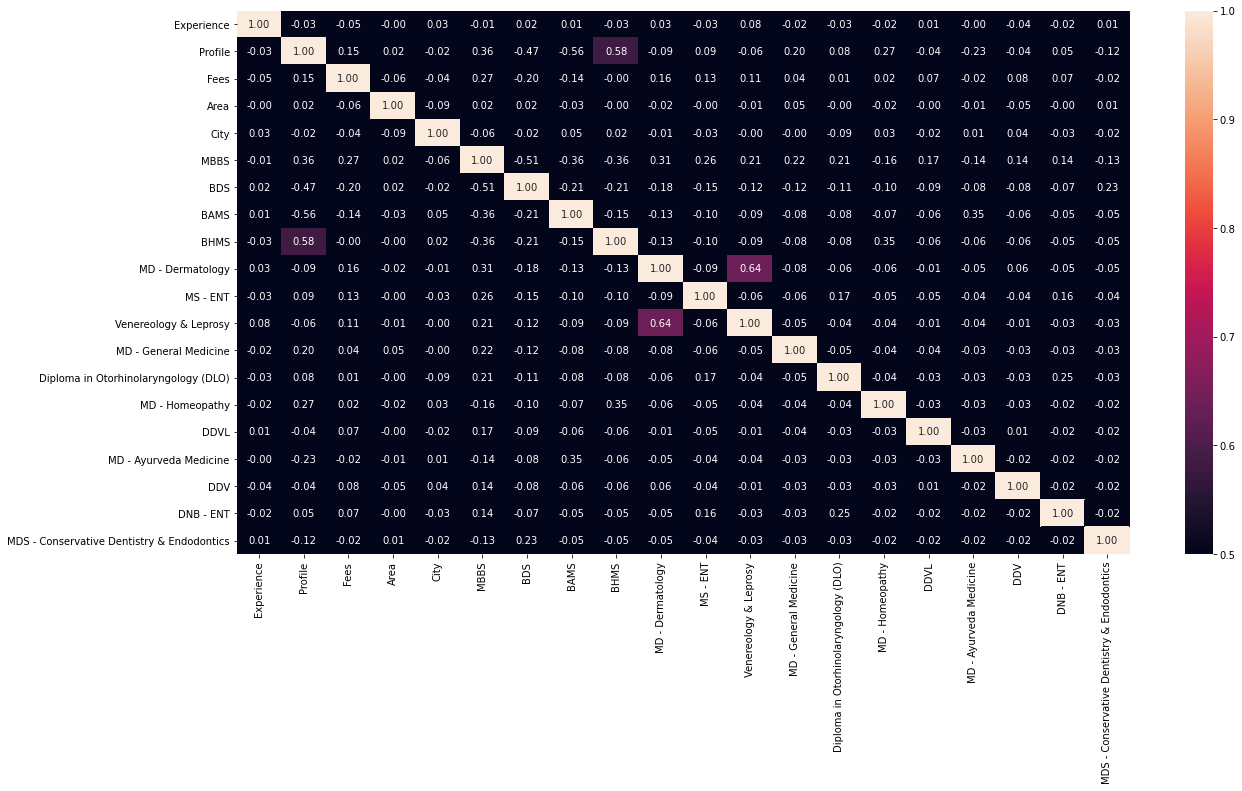

In [410]:
#Highlighting all the values greater than 0.5
#Plot to highlight high positive correlations.
plt.figure(figsize = (20,10))
sb.heatmap(df.corr(), annot = True, fmt = '0.2f', vmin = 0.5, vmax = 1)

Observation: 

    We can see high positive correlation between MD-Dermatology and Venerology& Leprosy.
    
    BHMS and Profile

    We don't have to check for outliers or skewness in this dataset as all the columns are categorical. 

### Plotting X and Y

In [411]:
x = df.drop(columns='Fees')
y = df['Fees']

In [412]:
x.shape

(5961, 20)

In [413]:
x.head()

,Experience,Rating,Profile,Area,City,MBBS,BDS,BAMS,BHMS,MD - Dermatology,MS - ENT,Venereology & Leprosy,MD - General Medicine,Diploma in Otorhinolaryngology (DLO),MD - Homeopathy,DDVL,MD - Ayurveda Medicine,DDV,DNB - ENT,MDS - Conservative Dentistry & Endodontics
0,16.0,10,5.0,298.0,4.0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
1,3.0,10,0.0,858.0,0.0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
2,63.0,0,3.0,455.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,3.0,0,0.0,68.0,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,12.0,10,0.0,337.0,1.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [414]:
y.shape

(5961,)

In [415]:
y.head()

0    100
1    350
2    300
3    250
4    250
Name: Fees, dtype: int64

In [416]:
x_cols = ['Experience', 'Rating', 'Profile', 'Area', 'City', 'MBBS', 'BDS',
       'BAMS', 'BHMS', 'MD - Dermatology', 'MS - ENT', 'Venereology & Leprosy',
       'MD - General Medicine', 'Diploma in Otorhinolaryngology (DLO)',
       'MD - Homeopathy', 'DDVL', 'MD - Ayurveda Medicine', 'DDV', 'DNB - ENT',
       'MDS - Conservative Dentistry & Endodontics']

### Scaling

In [417]:
from sklearn.preprocessing import StandardScaler

In [418]:
sc = StandardScaler()

In [419]:
x = sc.fit_transform(x)

In [420]:
x = pd.DataFrame(x, columns = x_cols)
x

,Experience,Rating,Profile,Area,City,MBBS,BDS,BAMS,BHMS,MD - Dermatology,MS - ENT,Venereology & Leprosy,MD - General Medicine,Diploma in Otorhinolaryngology (DLO),MD - Homeopathy,DDVL,MD - Ayurveda Medicine,DDV,DNB - ENT,MDS - Conservative Dentistry & Endodontics
0,-0.334883,1.162706,1.543016,-0.448939,0.397991,-0.942753,-0.544198,-0.382840,2.639934,-0.336091,-0.272129,-0.227363,-0.224079,-0.208788,5.650991,-0.166609,-0.154515,-0.148726,-0.137114,-0.135197
1,-0.955840,1.162706,-1.472893,1.740198,-1.331496,-0.942753,-0.544198,2.612056,-0.378797,-0.336091,-0.272129,-0.227363,-0.224079,-0.208788,-0.176960,-0.166609,6.471854,-0.148726,-0.137114,-0.135197
2,1.910118,-0.892962,0.336652,0.164801,-1.331496,1.060723,-0.544198,-0.382840,-0.378797,-0.336091,-0.272129,-0.227363,-0.224079,-0.208788,-0.176960,-0.166609,-0.154515,-0.148726,-0.137114,-0.135197
3,-0.955840,-0.892962,-1.472893,-1.348049,-1.331496,-0.942753,-0.544198,2.612056,-0.378797,-0.336091,-0.272129,-0.227363,-0.224079,-0.208788,-0.176960,-0.166609,-0.154515,-0.148726,-0.137114,-0.135197
4,-0.525947,1.162706,-1.472893,-0.296481,-0.899125,-0.942753,-0.544198,2.612056,-0.378797,-0.336091,-0.272129,-0.227363,-0.224079,-0.208788,-0.176960,-0.166609,-0.154515,-0.148726,-0.137114,-0.135197
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5956,-0.621478,1.162706,0.336652,-1.340231,-1.331496,1.060723,-0.544198,-0.382840,-0.378797,-0.336091,3.674731,-0.227363,-0.224079,-0.208788,-0.176960,-0.166609,-0.154515,-0.148726,-0.137114,-0.135197
5957,0.142777,-0.892962,0.939834,0.489262,-0.899125,1.060723,-0.544198,-0.382840,-0.378797,-0.336091,-0.272129,-0.227363,-0.224079,-0.208788,-0.176960,-0.166609,-0.154515,-0.148726,-0.137114,-0.135197
5958,0.572671,1.162706,0.939834,-0.765582,-0.034381,1.060723,-0.544198,-0.382840,-0.378797,-0.336091,-0.272129,-0.227363,-0.224079,-0.208788,-0.176960,-0.166609,-0.154515,-0.148726,-0.137114,-0.135197
5959,-0.812542,0.957139,0.939834,1.681560,1.262735,1.060723,-0.544198,-0.382840,-0.378797,-0.336091,-0.272129,-0.227363,4.462711,-0.208788,-0.176960,-0.166609,-0.154515,-0.148726,-0.137114,-0.135197


### Importing the models

In [421]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso, Ridge, ElasticNet
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [422]:
#Creating instances for each model
lr = LinearRegression()
knr = KNeighborsRegressor()
dtr = DecisionTreeRegressor()
svr = SVR()
rfr = RandomForestRegressor()
ls = Lasso()
rd = Ridge()
eln = ElasticNet()

In [423]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 100)

In [424]:
x_train.shape

(4172, 20)

In [425]:
x_test.shape

(1789, 20)

In [426]:
y_train.shape

(4172,)

In [427]:
y_test.shape

(1789,)

In [428]:
model = [lr, knr, dtr, svr, rfr, ls, rd, eln]
for m in model:
    print(m)
    m.fit(x_train, y_train)
    a = m.score(x_train, y_train)
    pred_test = m.predict(x_test)
    pred_train = m.predict(x_train)
    print('Score: ', a)
    print('Mean absolute error: ', mean_absolute_error(y_test,pred_test))
    print('Mean squared error: ', mean_squared_error(y_test,pred_test))
    print('Root mean squared error: ', np.sqrt(mean_squared_error(y_test,pred_test)))
    print('R2 Score: ', r2_score(y_test,pred_test))
    print('\n\n')

LinearRegression()
Score:  0.14760817653006186
Mean absolute error:  143.31631756594908
Mean squared error:  31302.86718687432
Root mean squared error:  176.9261630931794
R2 Score:  0.10435543544443737



KNeighborsRegressor()
Score:  0.36681995154192526
Mean absolute error:  145.29133594186698
Mean squared error:  34842.375651201786
Root mean squared error:  186.66112517394131
R2 Score:  0.0030822358251199056



DecisionTreeRegressor()
Score:  0.9920928356098531
Mean absolute error:  168.6098378982672
Mean squared error:  56874.78696975343
Root mean squared error:  238.4843537210637
R2 Score:  -0.6273139934949732



SVR()
Score:  0.06929302085131117
Mean absolute error:  144.17107875353693
Mean squared error:  33551.53117165101
Root mean squared error:  183.17077051661659
R2 Score:  0.040016163790702275



RandomForestRegressor()
Score:  0.8785948222988431
Mean absolute error:  134.89772664963135
Mean squared error:  31421.56004379498
Root mean squared error:  177.26127621055588
R2 Sc

### Cross Validation

In [429]:
from sklearn.model_selection import cross_val_score

In [430]:
model = [lr, knr, dtr, svr, rfr, ls, rd, eln]
for m in model: 
    score = cross_val_score(m, x, y, cv = 5)
    cv_mean = score.mean()
    print(m ,':' ,cv_mean)
    print('\n')

LinearRegression() : 0.12858850011672793


KNeighborsRegressor() : 0.02355375748648476


DecisionTreeRegressor() : -0.46067510125171196


SVR() : 0.06068256203961819


RandomForestRegressor() : 0.15841589690536947


Lasso() : 0.1271708189754654


Ridge() : 0.12859288751734685


ElasticNet() : 0.11987412844942251




    We can take our best model as DecisionTree as it has the best scores. 

### Re-running the best model 

In [431]:
dtr.fit(x_train, y_train)
a = dtr.score(x_train, y_train)
pred_test_dtr = dtr.predict(x_test)
pred_train_dtr = dtr.predict(x_train)
print('Score: ', a)
print('Mean absolute error: ', mean_absolute_error(y_test,pred_test_dtr))
print('Mean squared error: ', mean_squared_error(y_test,pred_test_dtr))
print('Root mean squared error: ', np.sqrt(mean_squared_error(y_test,pred_test_dtr)))
print('R2 Score: ', r2_score(y_test,pred_test_dtr))

Score:  0.9920928356098531
Mean absolute error:  166.79224892863797
Mean squared error:  56346.36171666356
Root mean squared error:  237.3738859197944
R2 Score:  -0.6121945731914458


    We're getting a 61% accuracy in the model

### GridSearchCV

In [432]:
from sklearn.model_selection import GridSearchCV

In [433]:
parameters = {'criterion': ['mse', 'friedman_mse', 'mae', 'poisson'], 'max_features' : ['auto', 'sqrt', 'log2']}
dtr = DecisionTreeRegressor()
clf = GridSearchCV(dtr, parameters, cv = 3, n_jobs = -1, verbose = 2)
clf.fit(x_train, y_train)

print(clf.best_params_)

Fitting 3 folds for each of 12 candidates, totalling 36 fits
{'criterion': 'mae', 'max_features': 'sqrt'}


In [434]:
dtr = DecisionTreeRegressor(criterion = 'mae', max_features = 'sqrt')
dtr.fit(x_train, y_train)
dtr.score(x_train, y_train)
pred_dtr = dtr.predict(x_test)

dtrsc = r2_score(y_test, pred_dtr)
dtrsc

-0.519117464031102

    We're getting 44% accuracy

### Plotting the fit

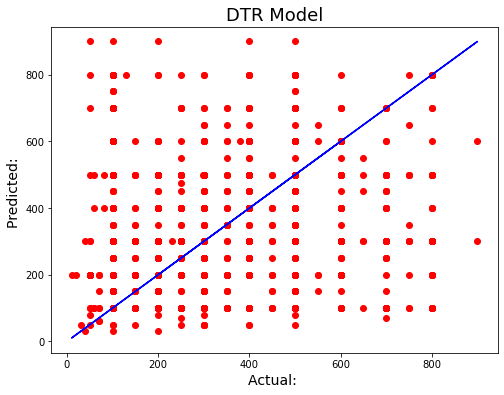

In [435]:
plt.figure(figsize = (8,6))
plt.scatter(x = y_test, y = pred_dtr, color = 'r')
plt.plot(y_test, y_test, color = 'b')
plt.xlabel('Actual: ', fontsize = 14)
plt.ylabel('Predicted: ', fontsize = 14)
plt.title('DTR Model', fontsize = 18)
plt.show()

### Saving the model

In [436]:
import joblib
joblib.dump(dtr, 'Doctor_Consult_fee.obj')

['Doctor_Consult_fee.obj']

### Importing the test data

    Running the same EDA we did for the train file

In [437]:
df_test = pd.read_excel('Test.xlsx')

In [438]:
df_test.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info
0,MBBS,35 years experience,NaN,"Ghatkopar East, Mumbai",General Medicine,NaN
1,"MBBS, Diploma in Otorhinolaryngology (DLO)",31 years experience,NaN,"West Marredpally, Hyderabad",ENT Specialist,NaN
2,"MBBS, DDVL",40 years experience,70%,"KK Nagar, Chennai",Dermatologists,"70% 4 Feedback KK Nagar, Chennai"
3,BAMS,0 years experience,NaN,"New Ashok Nagar, Delhi",Ayurveda,NaN
4,"BDS, MDS - Conservative Dentistry & Endodontics",16 years experience,100%,"Kanakpura Road, Bangalore",Dentist,General Dentistry Conservative Dentistry Cosme...


In [439]:
df_test['Place'].fillna('None,None',inplace=True)

In [440]:
df_test['Area'] = df_test['Place'].str.rsplit(',',1).str.get(0)
df_test['City'] = df_test['Place'].str.rsplit(',',1).str.get(1)

In [441]:
df_test.drop(columns='Place',inplace=True)

In [442]:
most_qual = sorted(Qualification.items(), key=lambda x:x[1], reverse=True)[:15]
final_qual = []
for qual in most_qual:
    final_qual.append(qual[0])
for title in final_qual:
    df_test[title] = 0

In [443]:
for x,y in zip(df_test['Qualification'].values, np.array([i for i in range(len(df_test))])):
    for c in x:
        c = c.strip()
        if c in final_qual:
            dft[c][y] = 1


In [444]:
df_test.head()

,Qualification,Experience,Rating,Profile,Miscellaneous_Info,Area,City,MBBS,BDS,BAMS,...,MS - ENT,Venereology & Leprosy,MD - General Medicine,Diploma in Otorhinolaryngology (DLO),MD - Homeopathy,DDVL,MD - Ayurveda Medicine,DDV,DNB - ENT,MDS - Conservative Dentistry & Endodontics
0,MBBS,35 years experience,NaN,General Medicine,NaN,Ghatkopar East,Mumbai,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,"MBBS, Diploma in Otorhinolaryngology (DLO)",31 years experience,NaN,ENT Specialist,NaN,West Marredpally,Hyderabad,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,"MBBS, DDVL",40 years experience,70%,Dermatologists,"70% 4 Feedback KK Nagar, Chennai",KK Nagar,Chennai,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,BAMS,0 years experience,NaN,Ayurveda,NaN,New Ashok Nagar,Delhi,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,"BDS, MDS - Conservative Dentistry & Endodontics",16 years experience,100%,Dentist,General Dentistry Conservative Dentistry Cosme...,Kanakpura Road,Bangalore,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [445]:
df_test.drop(columns='Qualification', axis = 1, inplace = True)

In [446]:
df_test['Rating'].fillna('-9%',inplace=True)

In [447]:
for i in df_test['Rating'].value_counts().index:
    df_test['Rating'].replace(i,int(i[:-1]),inplace=True)

In [448]:
bins = [-10,0,10,20,30,40,50,60,70,80,90,100]
labels = [i for i in range(11)]
df_test['Rating'] = pd.cut(df_test['Rating'], bins=bins, labels=labels, include_lowest=True)

In [453]:
df_test.drop(columns='Miscellaneous_Info', axis = 1, inplace = True)

In [454]:
df_test['Experience'] = oe.fit_transform(df_test['Experience'].values.reshape(-1,1))
df_test['Area'] = oe.fit_transform(df_test['Area'].values.reshape(-1,1))
df_test['Profile'] = oe.fit_transform(df_test['Profile'].values.reshape(-1,1))
df_test['City'] = oe.fit_transform(df_test['City'].values.reshape(-1,1))

In [455]:
df_test.head()

,Experience,Rating,Profile,Area,City,MBBS,BDS,BAMS,BHMS,MD - Dermatology,MS - ENT,Venereology & Leprosy,MD - General Medicine,Diploma in Otorhinolaryngology (DLO),MD - Homeopathy,DDVL,MD - Ayurveda Medicine,DDV,DNB - ENT,MDS - Conservative Dentistry & Endodontics
0,28.0,0,4.0,142.0,6.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,24.0,0,3.0,578.0,5.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,34.0,7,2.0,212.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0.0,0,0.0,373.0,3.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,7.0,10,1.0,231.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### Re-importing the model

In [456]:
testing = joblib.load('Doctor_Consult_fee.obj')
test_prediction = testing.predict(df_test)

In [457]:
pd.DataFrame(test_prediction)

,0
0,80.0
1,80.0
2,200.0
3,80.0
4,200.0
...,...
1982,200.0
1983,200.0
1984,200.0
1985,200.0
